In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbrn

fontsize = 13
custom = {"axes.edgecolor": "black","grid.linestyle": "dashed", "grid.color": "gray"}
sbrn.set_context('paper')
sbrn.set_style("whitegrid", rc = custom)

# Open the JSON file for reading
with open('heat3djuly11.json', 'r') as file:
    data = json.load(file)
    
df = pd.json_normalize(data['benchmarks'])
df['repetition_index'] = df['repetition_index'].fillna(0)

In [2]:
# Customize the x-axis ticks to show byte values more clearly
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Customize the y-axis ticks to show time values more clearly
def time_formatter(y, pos):
    if y < 1:
        return f'{y * 1000:.1f} ns'
    elif y < 1000:
        return f'{y:.1f} us'
    elif y < 1000000:
        return f'{y / 1000:.1f} ms'
    else:
        return f'{y / 1000000:.1f} s'

In [3]:
extracted_data = []

# Loop through the benchmarks in the JSON data
for i,benchmark in df.iterrows() :
    
    # Extract the relevant information
    name = benchmark['name']
    real_time = benchmark['real_time']
    
    # Determine the communication type from the name
    if 'heat3d_mpi/' in name:
        comm_type = 'MPI'
    elif 'kc_dc' in name:
        comm_type = 'KokkosComm Deep Copy'
    elif 'kc_mpidt' in name:
        comm_type = 'KokkosComm MPI Datatype'
    else:
        continue  # Skip if neither
        
    # Append the extracted information to the list
    if 'mean' in name:
        extracted_data.append({'comm_type': comm_type, 'real_time': real_time})

edf = pd.DataFrame(extracted_data)

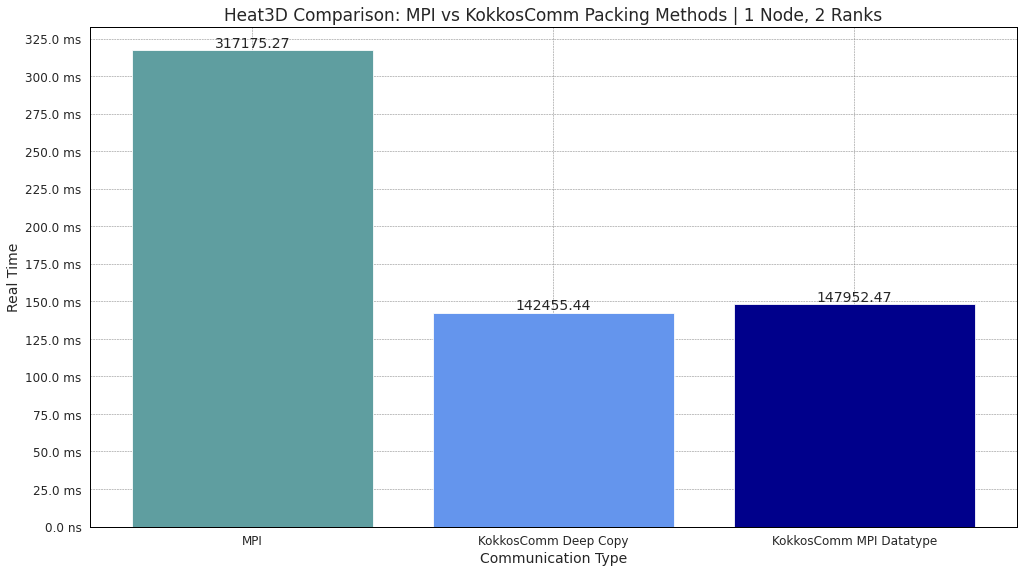

In [4]:
# spack load kokkos
# mpirun -np 2 ./build/perf_tests/perf_test-main 
# --benchmark_repetitions=5 --benchmark_filter=heat3d 
# --benchmark_format=json > "output$(date '+%Y%m%d%H%M%S').json"

# Plot 0: 1 Node, 2 Ranks
plt.figure(figsize=(14, 8))
plt.title('Heat3D Comparison: MPI vs KokkosComm Packing Methods | 1 Node, 2 Ranks', fontsize=fontsize + 4)
bars = plt.bar(edf['comm_type'], edf['real_time'], color=['cadetblue', 'cornflowerblue', 'darkblue'])
plt.xlabel('Communication Type', fontsize=fontsize+1)
plt.ylabel('Real Time', fontsize=fontsize+1)
plt.tight_layout()
plt.xticks(fontsize=fontsize-1)
plt.yticks(fontsize=fontsize-1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(time_formatter))

# Increase the number of y-axis ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=fontsize+1)

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig("./PNG/heat3d.png", dpi=300)
plt.show()

In [5]:
# Open the JSON file for reading
with open('heat3djuly112nodes.json', 'r') as file:
    data = json.load(file)
    
df = pd.json_normalize(data['benchmarks'])
df['repetition_index'] = df['repetition_index'].fillna(0)

In [6]:
extracted_data = []

# Loop through the benchmarks in the JSON data
for i,benchmark in df.iterrows() :
    
    # Extract the relevant information
    name = benchmark['name']
    real_time = benchmark['real_time']
    
    # Determine the communication type from the name
    if 'heat3d_mpi/' in name:
        comm_type = 'MPI'
    elif 'kc_dc' in name:
        comm_type = 'KokkosComm Deep Copy'
    elif 'kc_mpidt' in name:
        comm_type = 'KokkosComm MPI Datatype'
    else:
        continue  # Skip if neither
        
    # Append the extracted information to the list
    if 'mean' in name:
        extracted_data.append({'comm_type': comm_type, 'real_time': real_time})

edf = pd.DataFrame(extracted_data)

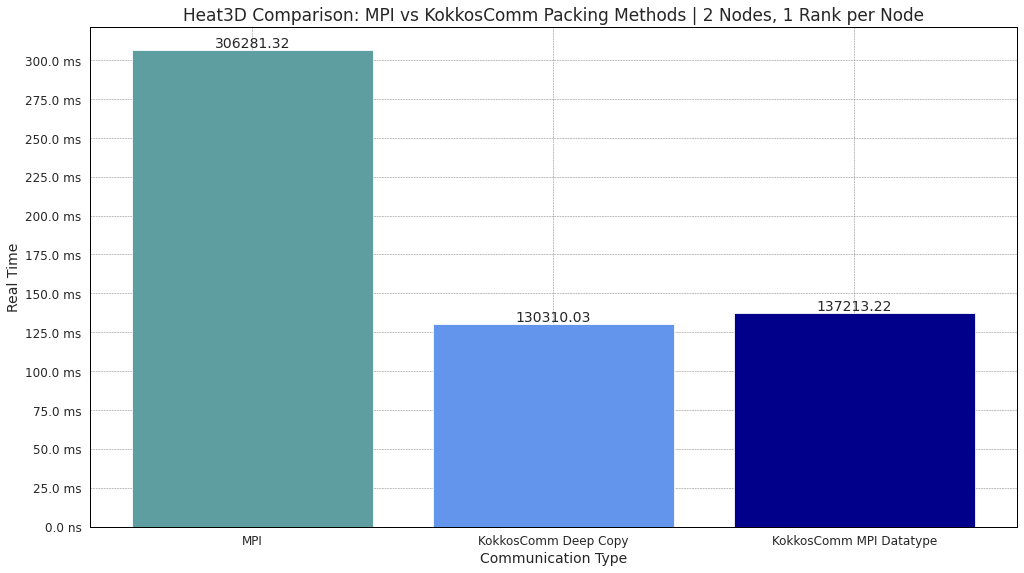

In [7]:
# spack load kokkos
# mpirun -np 2 -npernode 1 --host weaver1,weaver2 ./build/perf_tests/perf_test-main 
# --benchmark_repetitions=5 --benchmark_filter=osu --benchmark_format=json 
# > "output$(date '+%Y%m%d%H%M%S').json"

# Plot 1: 2 Nodes, 1 Rank per Node
plt.figure(figsize=(14, 8))
plt.title('Heat3D Comparison: MPI vs KokkosComm Packing Methods | 2 Nodes, 1 Rank per Node', fontsize=fontsize + 4)
bars = plt.bar(edf['comm_type'], edf['real_time'], color=['cadetblue', 'cornflowerblue', 'darkblue'])
plt.xlabel('Communication Type', fontsize=fontsize+1)
plt.ylabel('Real Time', fontsize=fontsize+1)
plt.tight_layout()
plt.xticks(fontsize=fontsize-1)
plt.yticks(fontsize=fontsize-1)

plt.gca().yaxis.set_major_formatter(FuncFormatter(time_formatter))

# Increase the number of y-axis ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=15))
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=fontsize+1)

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.savefig("./PNG/heat3d2nodes.png", dpi=300)
plt.show()